Предварительный план:  
*   1. Проверить/поменять метод подбора параметров кластеризации алгоритма.    
    2. Уточнить наличие данных, в которых устранена погрешность в однородности.  
    3. Применить алгоритм к экспериментальным данным.  
    4. Разбить все данные на разные частицы и поискать закономерности.  
    5. Регрессия на параметрах распределений.  
    6. Как перейти на следующий уровень взаимодействия?  
    7. Проверка файла Clasterization. Сравнение алгоритмов кластеризации.

В этом ноутбуке строятся распределения **старого** и **нового** банка **модельных** событий, некоторое сравнение.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

In [20]:
# ГРАФИКА
large = 22; med = 18; small = 16
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline
sns.set(style="whitegrid")

In [5]:
data = pd.read_csv('data/AllMc0.csv')

In [6]:
data = pd.read_csv('datachanged/AllMc0C')

In [7]:
print(data.shape)
data.head()

(27157, 14)


,Unnamed: 0,num_of_family,j,X(J),Y(J),E(J),H(J),A0,R,cnt,ER,sum_energy,lg_r,lg_e_r
0,0,1,1,-3.013189,-7.227429,4.611031,1255.250,1,7.830392,26,36.106180,370.199507,0.893784,1.557582
1,1,1,2,-1.310529,-2.563248,12.047700,1545.054,1,2.878841,26,34.683415,370.199507,0.459218,1.540122
2,2,1,3,-2.178048,-2.144561,5.401844,3044.520,1,3.056638,26,16.511481,370.199507,0.485244,1.217786
3,3,1,4,-0.965465,-0.082880,5.325506,4715.523,1,0.969016,26,5.160501,370.199507,-0.013669,0.712692
4,4,1,5,-1.621645,0.079540,15.935060,3044.520,1,1.623595,26,25.872076,370.199507,0.210478,1.412831


In [6]:
data.columns

Index(['Unnamed: 0', ' num_of_family', ' j', 'X(J)', 'Y(J)', 'E(J)', 'H(J)',
       'A0', 'R', 'cnt', 'ER', 'sum_energy', 'lg_r', 'lg_e_r'],
      dtype='object')

In [7]:
sum_data = data[[' num_of_family', 'E(J)']].groupby(' num_of_family').sum().reset_index()['E(J)']

In [8]:
newdata = pd.read_csv('newdata/outBCR.txt')

In [9]:
num = pd.read_csv('newdata/out_num_of_family_BCR.txt')

In [10]:
newdata[' num_of_family'] = num[' num_of_family']

In [11]:
print(newdata.shape)
newdata.head()

(115542, 6)


,j,X(J),Y(J),E(J),H(J),num_of_family
0,1,-1.003864,-3.303490,10.277430,386.4846,1
1,2,0.784310,-3.802153,10.897720,386.4846,1
2,3,0.743794,-3.544209,37.963690,386.4846,1
3,4,0.794200,-3.365848,8.588169,386.4846,1
4,5,0.780001,-3.368549,7.276401,386.4846,1


In [12]:
sum_new_data = newdata[[' num_of_family', 'E(J)']].groupby(' num_of_family').sum().reset_index()['E(J)']

Построить энергетический спектры событий отдельно по старой базе (без повторяющихся событий и с ними) и по новой базе. 

In [13]:
oldE = pd.read_csv('newdata/E0_BCR.txt')
newE = pd.read_csv('newdata/E0_7_BCR.txt')

In [14]:
oldE.columns

Index([' num_of_family', ' E0', ' A0'], dtype='object')

In [15]:
def OneGraphic_Normalized( dataS2, L, R, Some2, title, w, tit):
    
    title = f"{title}_{Some2}"
    
    bins = np.linspace(L, R, 50)
    
    x2, bins2, p2 = plt.hist(dataS2, bins, density = True, histtype=f'{w}', alpha=0.5,  label=f'mc0', color="orange")
    # density = True это нормировка
    
    box_1 = {'facecolor':'white',    #  цвет области
       'edgecolor': 'red',     #  цвет крайней линии
       'boxstyle': 'round'}
    
    box_str = f'{Some2}_mean: mc0 = {round(np.mean(dataS2), 2)} {Some2}_max: = {round(np.max(dataS2), 1)}'
    
    
    plt.xlabel(box_str, size = 13)
    
    plt.legend(loc='upper right')
    plt.title(title, fontsize=16)
    plt.style.use('seaborn-deep')
    
    plt.savefig(f'images/two_banks/{tit}.png', dpi=100)

In [37]:
def TwoGraphics_Normalized( dataS1, dataS2, L, R, Some1, Some2, title, w, tit):
    
    title = f"{title}_{Some1}"
    
    bins = np.linspace(L, R, 50)
    
    x1, bins1, p1 = plt.hist(dataS1, bins,density = True, histtype=f'{w}', alpha=0.5, label=f'old_mc0', color="green", log = True)
    x2, bins2, p2 = plt.hist(dataS2, bins, density = True, histtype=f'{w}', alpha=0.5,  label=f'new_mc0', color="orange", log = True)
    # density = True это нормировка
    
    box_1 = {'facecolor':'white',    #  цвет области
       'edgecolor': 'red',     #  цвет крайней линии
       'boxstyle': 'round'}
    
    box_str = f'{Some1}_mean: old = {round(np.mean(dataS1), 2)} new = {round(np.mean(dataS2), 2)} '
    
    
    plt.xlabel(box_str, size = 13)
    
    plt.legend(loc='upper right')
    plt.title(title, fontsize=16)
    plt.style.use('seaborn-deep')
    
    #plt.savefig(f'images/two_banks/{tit}.png', dpi=100)

810425.9


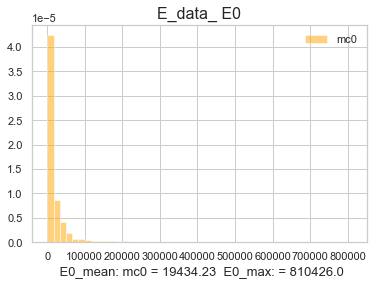

In [17]:
file_name = 'Первичная_энергия_старый'

n = ' E0'
l = min( list(oldE[n].values))
r = max( list(oldE[n].values))
print(r)

OneGraphic_Normalized(np.around(oldE[n].values), l, r, n, 'E_data', 'barstacked', file_name)

2773817.0


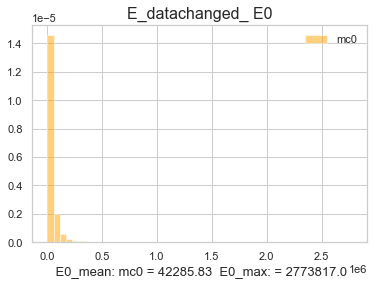

In [18]:
file_name = 'Первичная_энергия_новый'

n = ' E0'
l = min( list(newE[n].values))
r = max( list(newE[n].values))
print(r)

OneGraphic_Normalized(np.around(newE[n]), l, r, n, 'E_datachanged', 'barstacked', file_name)

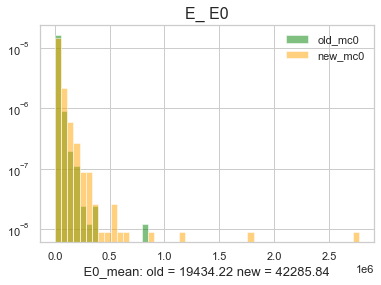

In [19]:
file_name = 'Сравнение_первичных_весь_диапазон'

n = ' E0'
l = min( list(oldE[n].values)+ list(newE[n].values) )
r = max( list(oldE[n].values) + list(newE[n].values) )

TwoGraphics_Normalized(oldE[n],newE[n],l, r, n, n, 'E', 'barstacked', file_name)

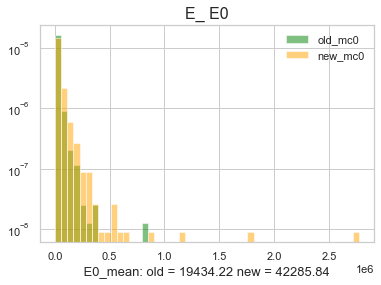

In [20]:
file_name = 'Сравнение_первичных_диапазон_до_700'
n = ' E0'
l = 700
r = max( list(oldE[n].values) + list(newE[n].values) )
TwoGraphics_Normalized(oldE[n],newE[n],l, r, n, n, 'E', 'barstacked', file_name)

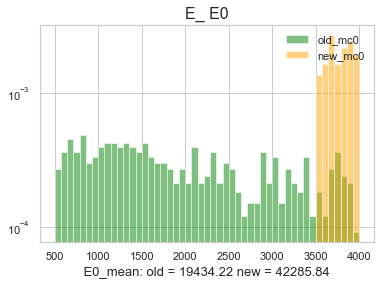

In [21]:
file_name = 'Сравнение_первичных_диапазон_500_4000'
n = ' E0'
l = 500
r = 4000
TwoGraphics_Normalized(oldE[n],newE[n],l, r, n, n, 'E', 'barstacked', file_name)

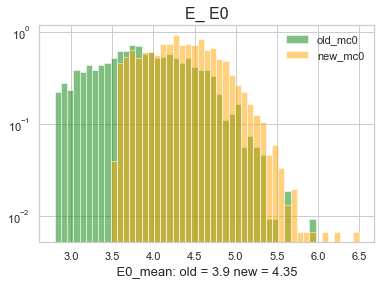

In [22]:
# Сравнение логарифмированных
file_name = 'Сравнение_первичных_диапазон_500_50000'
n = ' E0'
l = 2.8
r = 6.5
TwoGraphics_Normalized(np.log10(oldE[n]), np.log10(newE[n]),l, r, n, n, 'E', 'barstacked', file_name)

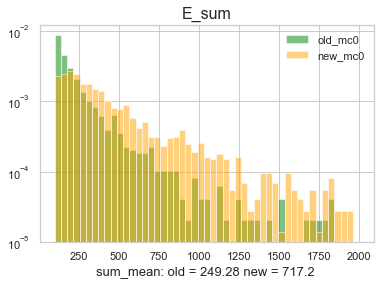

In [25]:
file_name = 'Сравнение_суммарных_диапазон_100_2000'
n = 'sum'
l = 100
r = 2000
TwoGraphics_Normalized(sum_data,sum_new_data,l, r, n, n, 'E', 'barstacked', file_name)

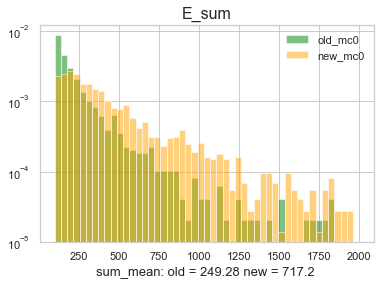

In [26]:
file_name = 'Сравнение_суммарных_диапазон_100_2000'
n = 'sum'
l = 100
r = 2000
TwoGraphics_Normalized(sum_data,sum_new_data,l, r, n, n, 'E', 'barstacked', file_name)

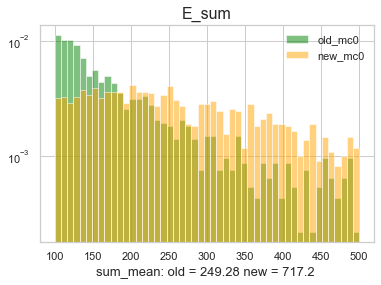

In [27]:
file_name = 'Сравнение_суммарных_диапазон_100_500'
n = 'sum'
l = 100
r = 500
TwoGraphics_Normalized(sum_data,sum_new_data,l, r, n, n, 'E', 'barstacked', file_name)

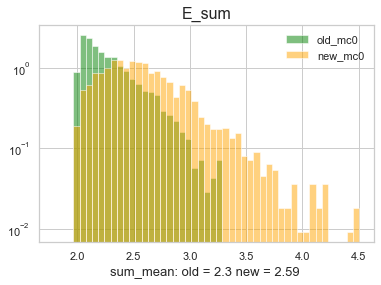

In [28]:
file_name = 'Сравнение_суммарных_диапазон_500_2000'
n = 'sum'
l = 1.8
r = np.log10(sum_new_data).max()
TwoGraphics_Normalized(np.log10(sum_data), np.log10(sum_new_data),l, r, n, n, 'E', 'barstacked', file_name)

<AxesSubplot:xlabel='E(J)', ylabel='Density'>

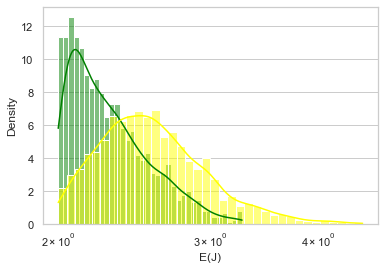

In [29]:
# Сравнение дважды логарифмированных.
sns.histplot(np.log10(sum_data), stat = 'density',  common_norm = True, kde=True, 
             bins=int(180/5), color = 'green', log_scale = True            )

sns.histplot(np.log10(sum_new_data), stat = 'density',  common_norm = True,  kde=True, 
             bins=int(180/5),   color = 'yellow', log_scale = True )

### Сравнение суммарных энергий моделей и эксперимента

In [2]:
# Экспериментальные данные.
AllExp = pd.read_csv('datachanged/AllExpC')
AllExp = AllExp.drop(['Unnamed: 0'], axis = 1)

In [6]:
AllExp.columns

Index([' num_of_fam', 'j', 'X(J)', 'Y(J)', 'E(J)', 'R', 'cnt', 'ER',
       'sum_energy', 'lg_r', 'lg_e_r'],
      dtype='object')

In [8]:
sum_energy_exp = AllExp[[' num_of_fam', 'sum_energy']].drop_duplicates()['sum_energy'].values

In [10]:
# Новый модельный банк.
AllMc0 = pd.read_csv('datachanged/AllMc0CNewBank', sep = '\t')
# Старый модельный банк.
olddata = pd.read_csv('datachanged/AllMc0COld', sep = '\t')

In [16]:
sum_energy_new = AllMc0[['num', 'sum_energy']].drop_duplicates()['sum_energy'].values

In [15]:
sum_energy_old = olddata[[' num_of_family', 'sum_energy']].drop_duplicates()['sum_energy'].values

In [34]:
def TwoGraphics(dataS1, dataS2, L, R, Some1, Some2, title, w, tit):
    
    title = f"{title}_{Some1}"
    
    bins = 50
    
    if L == 'old_model':
        model_color = 'green'
    elif L == 'new_model':
        model_color = 'yellow'
    else:
        print('error')
        model_color = 'blue'
    
    x1, bins1, p1 = plt.hist(np.log10(dataS1), bins,density = True, histtype=f'{w}', alpha=0.5, label=L, color=model_color, log = True)
    x2, bins2, p2 = plt.hist(np.log10(dataS2), bins, density = True, histtype=f'{w}', alpha=0.7,  label=R, color="pink", log = True)
    # density = True это нормировка
    
    box_1 = {'facecolor':'white',    #  цвет области
              'edgecolor': 'red',     #  цвет крайней линии
              'boxstyle': 'round'}
    
    box_str = f'{Some1}_mean: old = {round(np.mean(dataS1), 2)} new = {round(np.mean(dataS2), 2)} '
    
    
    plt.xlabel(box_str, size = 13)
    
    plt.legend(loc='upper right')
    plt.title(title, fontsize=16)
    plt.style.use('seaborn-deep')
    
    #plt.savefig(f'images/two_banks/{tit}.png', dpi=100)

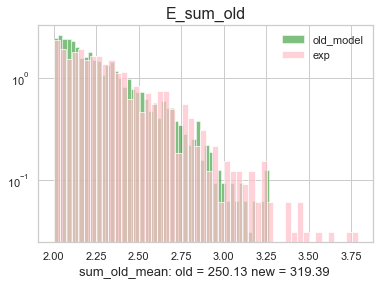

In [35]:
file_name = 'Сравнение_сумм_эн_старая_модель_экспер'
n = 'sum_old'
l = 'old_model'
r = 'exp'
TwoGraphics(sum_energy_old, sum_energy_exp, l, r, n, n, 'E', 'barstacked', file_name)

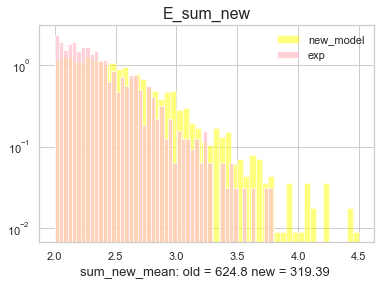

In [36]:
file_name = 'Сравнение_сумм_эн_новая_модель_экспер'
n = 'sum_new'
l = 'new_model'
r = 'exp'
TwoGraphics(sum_energy_new, sum_energy_exp, l, r, n, n, 'E', 'barstacked', file_name)

Связь между энергией первичной частицы и сумарной энергией в старом и новом банке.

In [19]:
# Первичная энергия событий в старой базе
oldE = pd.read_csv('newdata/E0_BCR.txt')
oldE = oldE.loc[oldE[' num_of_family']<1299].copy() # убираем дубли
# Первичная энергия событий в новой базе
newE = pd.read_csv('newdata/E0_7_BCR.txt')

In [25]:
AllMc0NewOldBank = pd.read_csv('datachanged/AllMc0NewL').drop('Unnamed: 0', axis = 1)
AllMc0NewOldBank = AllMc0NewOldBank.merge(oldE, left_on=' num_of_family', right_on=' num_of_family')

AllMc0NewNewBank = pd.read_csv('datachanged/AllMc0NewLNewBank').drop('Unnamed: 0', axis = 1)
AllMc0NewNewBank = AllMc0NewNewBank.merge(newE, left_on='num', right_on=' num_of_family')

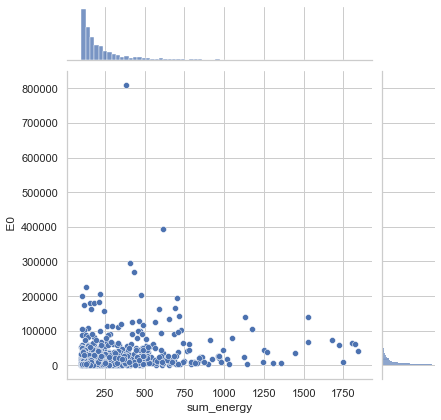

In [27]:
sns.jointplot(x = AllMc0NewOldBank['sum_energy'], y = AllMc0NewOldBank[' E0'],  kind='scatter')

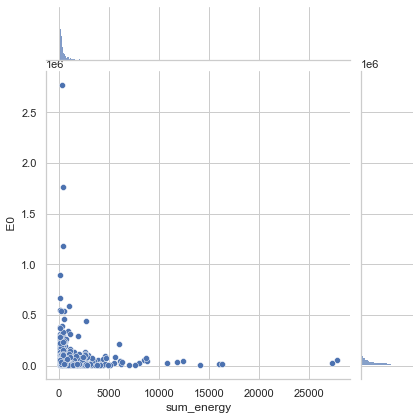

In [28]:
sns.jointplot(x = AllMc0NewNewBank['sum_energy'], y = AllMc0NewNewBank[' E0'],  kind='scatter')